In [17]:
import sklearn
import json
import operator
import matplotlib.pyplot as plt
import prettyplotlib as ppl
%matplotlib inline
hist1 = sklearn.externals.joblib.load('agent1_batthistexploitdet')
hist2 = sklearn.externals.joblib.load('agent2_batthistexploitdet')

In [18]:
def loader(dictionary):
    def load_keys(k):
        unjsoned = json.loads(k)
        loaded = tuple( ((tuple(unjsoned[0])), unjsoned[1] ))
        return loaded
    return {load_keys(k):v for k,v in dictionary.items()}
def get_score(hist):
    loaded = {k:len(json.loads(v)) for k,v in loader(hist).items()}
    not_running = sum([v for k,v in loaded.items() if k[0][1] == 'sleeping' and k[0][3]=='sleeping'])
    zero = sum([v for k,v in loaded.items() if k[0][0] == 0])
    total = sum([v for k,v in loaded.items()])
    return not_running, zero, total, not_running/total, zero/total
print(get_score(hist1))
print(get_score(hist2))

(129, 20, 1291, 0.09992254066615028, 0.015491866769945779)
(132, 94, 1283, 0.10288386593920498, 0.07326578332034295)


In [20]:
record = sklearn.externals.joblib.load('batt_writerexploitdet')
one = [(i[0], i[1]['battery']) for i in record if i[1]['_id']==0]
two = [(i[0], i[1]['battery']) for i in record if i[1]['_id']==1]

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


(0, 10)

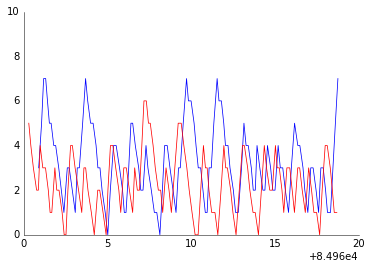

In [23]:
fig,ax = plt.subplots(1)
#one_plot = one[1083:1120]
#two_plot = two[1083:1120]
one_plot = one[300:420]
two_plot = two[300:420]
ppl.plot(ax, [i[0] for i in one_plot],[i[1] for i in one_plot] )
ppl.plot(ax, [i[0] for i in two_plot],[i[1] for i in two_plot], color = 'r' )
ax.set_ylim([0,10])

In [22]:
len(one)


1291

In [11]:
len(two)

11636